<a href="https://colab.research.google.com/github/Bhakti1106/Healthcare-Cost-Analysis/blob/main/bhakthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Boxplot of expenses by smoker
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Charges by Smoker Status')
plt.savefig('/content/drive/MyDrive/boxplot_smoker.png', bbox_inches='tight')
plt.close()

# Example: Scatterplot age vs expenses
plt.figure(figsize=(7,5))
sns.regplot(x='age', y='expenses', data=df, scatter_kws={'alpha':0.4})
plt.title('Age vs Charges (regression line)')
plt.savefig('/content/drive/MyDrive/age_expenses.png', bbox_inches='tight')
plt.close()

# Similarly save other charts

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Boxplot of expenses by smoker
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Charges by Smoker Status')
plt.savefig('/content/drive/MyDrive/boxplot_smoker.png', bbox_inches='tight')
plt.close()

# Example: Scatterplot age vs expenses
plt.figure(figsize=(7,5))
sns.regplot(x='age', y='expenses', data=df, scatter_kws={'alpha':0.4})
plt.title('Age vs Charges (regression line)')
plt.savefig('/content/drive/MyDrive/age_expenses.png', bbox_inches='tight')
plt.close()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")
print(df.head())


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [2]:

!pip install --quiet seaborn statsmodels
import os
print("Files in /content:", os.listdir('/content'))

Files in /content: ['.config', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
!pip install --quiet pandasql
import pandas as pd
from pandasql import sqldf

df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

query = """
SELECT
  region,
  smoker,
  ROUND(AVG(expenses), 2) AS avg_charges,
  COUNT(*) AS n_samples
FROM df
GROUP BY region, smoker
ORDER BY region, smoker;
"""

# The globals() dictionary makes the DataFrame 'df' available to sqldf
result = sqldf(query, globals())
print(result)

      region smoker  avg_charges  n_samples
0  northeast     no      9165.53        257
1  northeast    yes     29673.54         67
2  northwest     no      8556.46        267
3  northwest    yes     30192.00         58
4  southeast     no      8032.22        273
5  southeast    yes     34845.00         91
6  southwest     no      8019.29        267
7  southwest    yes     32269.06         58


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Overall
overall = df['expenses'].agg(['count','mean','median','std','min','max']).rename({'count':'n'})
print("Overall charges summary:\n", overall, "\n")

# By smoker
print("By smoker status:\n", df.groupby('smoker')['expenses'].agg(['count','mean','median','std']).round(2))

Overall charges summary:
 n          1338.000000
mean      13270.422414
median     9382.030000
std       12110.011240
min        1121.870000
max       63770.430000
Name: expenses, dtype: float64 

By smoker status:
         count      mean    median       std
smoker                                     
no       1064   8434.27   7345.40   5993.78
yes       274  32050.23  34456.35  11541.55


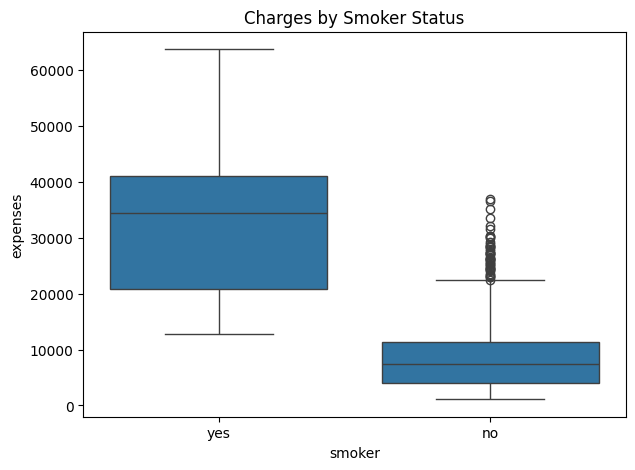

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Charges by Smoker Status')
plt.show()

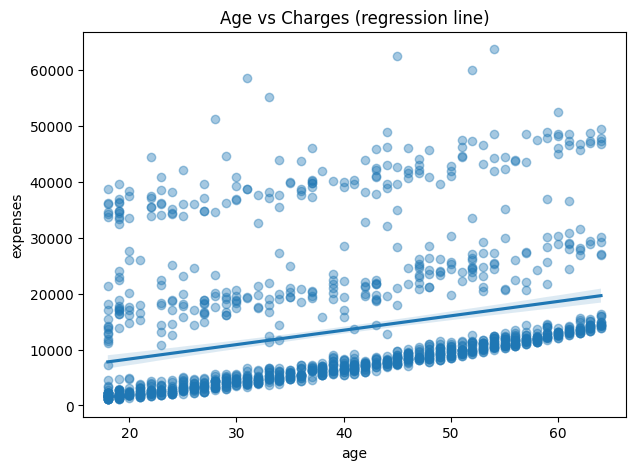

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x='age', y='expenses', data=df, scatter_kws={'alpha':0.4})
plt.title('Age vs Charges (regression line)')
plt.show()

In [ ]:
df2 = df.copy()
df2['smoker_bin'] = df2['smoker'].map({'yes':1,'no':0})
corr = df2[['age','bmi','children','smoker_bin','expenses']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Feature Correlation')
plt.savefig('/content/drive/MyDrive/feature_corr.png', bbox_inches='tight')
plt.close()

In [ ]:
plt.figure(figsize=(6,4))
df.groupby('region')['expenses'].mean().sort_values().plot(kind='bar')
plt.ylabel('Average expenses'); plt.title('Average Expense by Region')
plt.savefig('/content/drive/MyDrive/region_expenses.png', bbox_inches='tight')
plt.close()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI distribution')

plt.subplot(1,2,2)
sns.histplot(df['expenses'], kde=True)
plt.title('Expenses distribution (trimmed)')
plt.xlim(0, df['expenses'].quantile(0.99))
plt.savefig('/content/drive/MyDrive/bmi_expenses_dist.png', bbox_inches='tight')
plt.close()

In [ ]:
# Save the main DataFrame to a CSV file
df.to_csv('/content/insurance_data.csv', index=False)
print("Saved: /content/insurance_data.csv")

Saved: /content/insurance_data.csv


In [ ]:
query = """
SELECT
  region,
  smoker,
  ROUND(AVG(expenses), 2) AS avg_charges,
  COUNT(*) AS n_samples
FROM df
GROUP BY region, smoker
ORDER BY region, smoker;
"""

!pip install --quiet pandasql
from pandasql import sqldf

# The globals() dictionary makes the DataFrame 'df' available to sqldf
result = sqldf(query, globals())
print(result)

  Preparing metadata (setup.py) ... done
      region smoker  avg_charges  n_samples
0  northeast     no      9165.53        257
1  northeast    yes     29673.54         67
2  northwest     no      8556.46        267
3  northwest    yes     30192.00         58
4  southeast     no      8032.22        273
5  southeast    yes     34845.00         91
6  southwest     no      8019.29        267
7  southwest    yes     32269.06         58
